In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re

In [ ]:
# Global variables
random_state = 42

In [4]:
path = "csv/USvideos.csv"
df = pd.read_csv(path)
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


# Preprocess the data

## Stopwords

In [ ]:
df["original_title"] = df["title"].copy()

In [ ]:
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

df["title"] = df["title"].apply(lambda x: " ".join([word for word in x.split() if word.lower() not in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["original_title"].head(5)

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: original_title, dtype: object

In [ ]:
df["title"].head(5)

0                                   WANT TALK MARRIAGE
1    Trump Presidency: Last Week Tonight John Olive...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                        Nickelback Lyrics: Real Fake?
4                               Dare You: GOING BALD!?
Name: title, dtype: object

## Puctuation

In [ ]:
# Define a regex string to match punctuation (+ the underscore character)
regex = r"[^\w\s]|_"

# Define a lambda function to REPLACE punctuation from a string by a space character
remove_punct = lambda text: re.sub(regex, " ", text)

# Apply the remove_punct function to the "description" column
df["title"]  = df["title"] .apply(remove_punct)

In [ ]:
df["original_title"].head(5)

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: original_title, dtype: object

In [ ]:
df["title"].head(5)

0                                   WANT TALK MARRIAGE
1    Trump Presidency  Last Week Tonight John Olive...
2    Racist Superman   Rudy Mancuso  King Bach   Le...
3                        Nickelback Lyrics  Real Fake 
4                               Dare You  GOING BALD  
Name: title, dtype: object

## Lowercase

In [ ]:
df["title"] = df["title"].str.lower()

In [ ]:
df["original_title"].head(5)

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
Name: original_title, dtype: object

In [ ]:
df["title"].head(5)

0                                   want talk marriage
1    trump presidency  last week tonight john olive...
2    racist superman   rudy mancuso  king bach   le...
3                        nickelback lyrics  real fake 
4                               dare you  going bald  
Name: title, dtype: object

## Numbers

In [ ]:
df["title"] = df["title"].apply(lambda x: " ".join(re.findall(r"\d*[a-zA-Z][\w]*", x)))

In [ ]:
df["original_title"].head(10)

0                   WE WANT TO TALK ABOUT OUR MARRIAGE
1    The Trump Presidency: Last Week Tonight with J...
2    Racist Superman | Rudy Mancuso, King Bach & Le...
3                     Nickelback Lyrics: Real or Fake?
4                             I Dare You: GOING BALD!?
5                                2 Weeks with iPhone X
6            Roy Moore & Jeff Sessions Cold Open - SNL
7                  5 Ice Cream Gadgets put to the Test
8    The Greatest Showman | Official Trailer 2 [HD]...
9    Why the rise of the robots won’t mean the end ...
Name: original_title, dtype: object

In [ ]:
df["title"].head(10)

0                                   want talk marriage
1    trump presidency last week tonight john oliver...
2     racist superman rudy mancuso king bach lele pons
3                          nickelback lyrics real fake
4                                  dare you going bald
5                                       weeks iphone x
6                roy moore jeff sessions cold open snl
7                           ice cream gadgets put test
8    greatest showman official trailer hd 20th cent...
9                      rise robots won t mean end work
Name: title, dtype: object

## Remove empty title

In [ ]:
df_og = df.copy()
len(df_og)

40949

In [ ]:
mask = df['title'].str.len() != 0
df = df[mask]

In [ ]:
len(df)

40895

# Preprocessing the labels

## Category occurances

In [ ]:
label_counts = df['category_id'].value_counts()
label_counts

category_id
24    9964
10    6472
26    4143
23    3444
22    3210
25    2486
28    2389
1     2345
17    2174
27    1634
15     918
20     817
19     402
2      384
43      57
29      56
Name: count, dtype: int64

## Category occurances above a quantile

In [ ]:
category_counts = df['category_id'].value_counts().reset_index()
category_counts.columns = ["category_id", "count"]

In [ ]:
category_counts.tail()

,category_id,count
11,20,817
12,19,402
13,2,384
14,43,57
15,29,56


In [ ]:
quantile_70 = category_counts['count'].quantile(0.70)
top_category_counts = category_counts[category_counts['count'] >= quantile_70]
top_categories = top_category_counts["category_id"].values

In [ ]:
top_category_counts

,category_id,count
0,24,9964
1,10,6472
2,26,4143
3,23,3444
4,22,3210


In [ ]:
category_mapping = {}
number = 0
for cat in top_categories:
  if cat not in category_mapping:
    category_mapping[cat] = number
    number += 1
print(category_mapping)

{24: 0, 10: 1, 26: 2, 23: 3, 22: 4}


In [ ]:
df["original_category_id"] = df["category_id"].copy()

In [ ]:
df["category_id"] = df["original_category_id"].apply(lambda cat: category_mapping[cat] if cat in category_mapping else number)

## Rerun the category occurence with the "-1" group

In [ ]:
category_counts = df['category_id'].value_counts().reset_index()
category_counts.columns = ["category_id", "count"]

In [ ]:
category_counts.head()

,category_id,count
0,5,13662
1,0,9964
2,1,6472
3,2,4143
4,3,3444


## Distribution of the category occurence

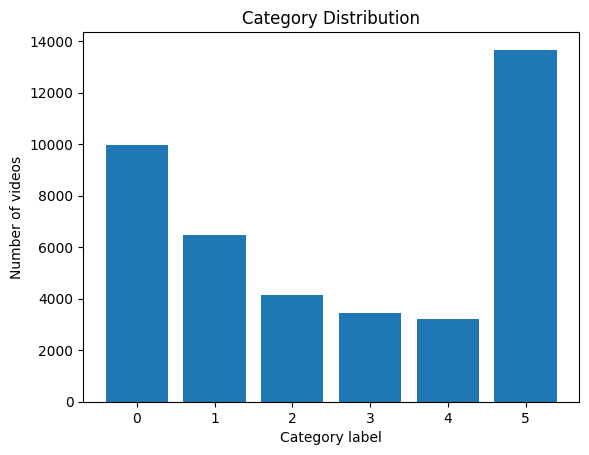

In [ ]:
# Plot the graph
plt.bar(category_counts['category_id'], category_counts["count"])

# Set labels and title
plt.xlabel("Category label")
plt.ylabel("Number of videos")
plt.title("Category Distribution")

# Show the plot
plt.show()

# Train & Test sets

In [ ]:
test_ratio = 0.2
train_ind, test_ind = train_test_split(df.index, test_size=test_ratio, shuffle=True, random_state=random_state)

train_df = df.loc[train_ind, :]
test_df = df.loc[test_ind, :]

## Balance the labels of the training set

In [ ]:
min_train_count = train_df["category_id"].value_counts().min()
min_train_count

2534

In [ ]:
train_df = pd.concat([group.sample(min_train_count) for name, group in train_df.groupby("category_id")])

In [ ]:
train_category_counts = train_df["category_id"].value_counts().reset_index()
train_category_counts.columns = ["category_id", "count"]

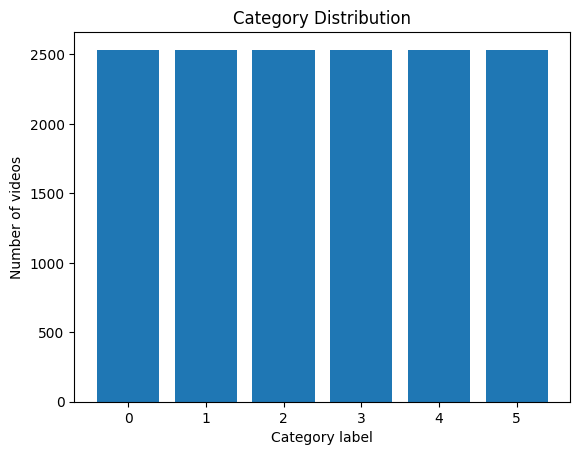

In [ ]:
# Plot the graph
plt.bar(train_category_counts['category_id'],train_category_counts["count"])

# Set labels and title
plt.xlabel("Category label")
plt.ylabel("Number of videos")
plt.title("Category Distribution")

# Show the plot
plt.show()

## Split test dataset into test and validation

In [ ]:
train_df_simple = train_df[["title","category_id"]]
train_df_simple.reset_index(drop=True, inplace=True)

test_df_simple = test_df[["title","category_id"]]
test_df_simple.reset_index(drop=True, inplace=True)

train_df_simple.head()

,title,category_id
0,jurassic world fallen kingdom official trailer hd,0
1,mcgriddle taste test fancy fast food,0
2,tomb raider movie review,0
3,edit vlog,0
4,saved max la ticket announcement,0


In [ ]:
X = test_df_simple.drop('category_id', axis=1)  # Features
y = test_df_simple['category_id']               # Target variable

# Test and Validation
X_test, X_val, y_test, y_val = train_test_split(
    X, y,
    test_size=0.2,             # 20% for validation
    stratify=y,                # Ensures stratified split
    random_state=random_state  # For reproducibility
)


val_df_simple = pd.concat([X_val, y_val.rename('category_id')], axis=1)
test_df_simple = pd.concat([X_test, y_test.rename('category_id')], axis=1)

In [ ]:
train_simple_path = "train_simple.csv"
train_df_simple.columns = ["text", "label"]
train_df_simple.to_csv(train_simple_path, index=False)

val_simple_path = "val_simple.csv"
val_df_simple.columns = ["text", "label"]
val_df_simple.to_csv(val_simple_path, index=False)

test_simple_path = "test_simple.csv"
test_df_simple.columns = ["text", "label"]
test_df_simple.to_csv(test_simple_path, index=False)